In [7]:
import numpy as numpy
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
train=pd.read_csv('../data/raw/train.csv')
store=pd.read_csv('../data/raw/store.csv')

C:\Users\Rohith Kumar\AppData\Local\Temp\ipykernel_23440\733830268.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv('../data/raw/train.csv')


In [10]:
print(train.shape)
print(store.shape)

(1017209, 9)
(1115, 10)


In [12]:
train.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [13]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [16]:
df=pd.merge(train, store, on="Store", how="left")
df.shape

(1017209, 18)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [18]:
df.isnull().mean().sort_values(ascending=False).head(20)

Promo2SinceWeek              0.499436
PromoInterval                0.499436
Promo2SinceYear              0.499436
CompetitionOpenSinceYear     0.317878
CompetitionOpenSinceMonth    0.317878
CompetitionDistance          0.002597
DayOfWeek                    0.000000
Store                        0.000000
Date                         0.000000
Sales                        0.000000
StoreType                    0.000000
SchoolHoliday                0.000000
StateHoliday                 0.000000
Promo                        0.000000
Open                         0.000000
Customers                    0.000000
Assortment                   0.000000
Promo2                       0.000000
dtype: float64

In [19]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek


In [21]:
df['Sales'].describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [23]:
df=df[df['Open']==1]
df=df[df['Sales']>1]

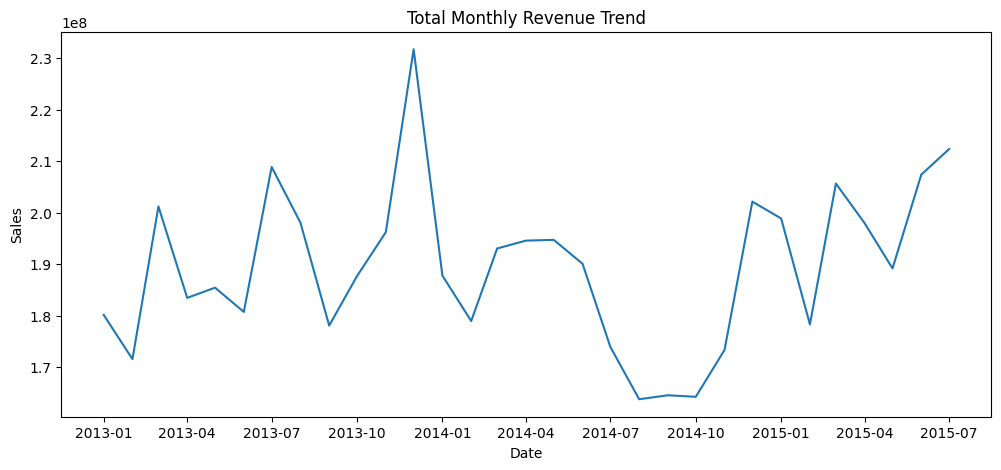

In [24]:
monthly_sales = df.groupby(['Year','Month'])['Sales'].sum().reset_index()

monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year','Month']].assign(DAY=1))

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_sales, x='Date', y='Sales')
plt.title("Total Monthly Revenue Trend")
plt.show()


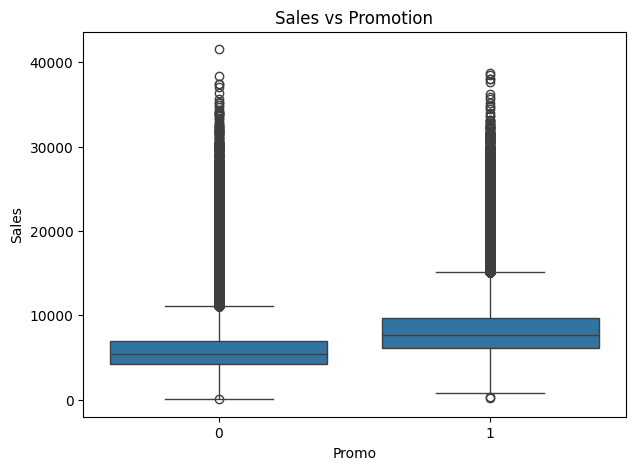

In [25]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Promo', y='Sales', data=df)
plt.title("Sales vs Promotion")
plt.show()


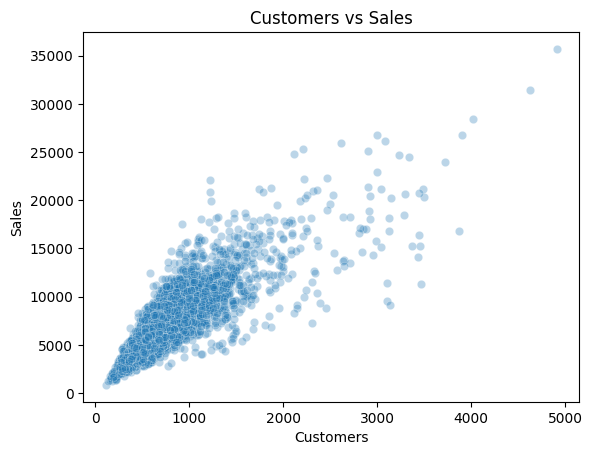

In [26]:
sns.scatterplot(data=df.sample(5000), x='Customers', y='Sales', alpha=0.3)
plt.title("Customers vs Sales")
plt.show()


In [28]:
monthly_sales[['Date','Sales']].to_csv("../data/processed/monthly_sales.csv", index=False)

print("monthly_sales.csv saved")


monthly_sales.csv saved
